In [1]:
import pandas as pd 
import numpy as np
import math
import tensorflow as tf
import matplotlib.pyplot as plt
print(pd.__version__)

1.2.0


## Print Dependencies



Dependences are fundamental to record the computational environment.

In [2]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p pandas,keras,numpy,math,tensorflow,matplotlib,h5py

# date
print (" ")
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.8.7
IPython version      : 7.18.1

pandas    : 1.2.0
keras     : 2.4.3
numpy     : 1.19.5
math      : unknown
tensorflow: 2.4.0
matplotlib: 3.3.3
h5py      : 2.10.0

Compiler    : Clang 12.0.0 (clang-1200.0.32.28)
OS          : Darwin
Release     : 20.2.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

 
Last updated: Mon Jan 25 2021 15:06:49CET



## Load of the test data

In [3]:
regen_data = False

In [4]:
if regen_data:
    from process import load_generate_data
    from process import savedata
    regr_data, class_data = load_generate_data(0.1, 50)
    savedata(regr_data, "regression_data.csv")
    savedata(class_data, "classification_data.csv")

In [38]:
if not regen_data:
    from process import loaddata
    regr_data = loaddata("regression_data-2.csv")
    class_data = loaddata("classification_data-2.csv")

In [39]:
np.random.shuffle(class_data)
yc_test = class_data[:,0]
xc_test = class_data[:,1:]

In [40]:
np.random.shuffle(regr_data)
yr_test = regr_data[:,-3:]
xr_test = regr_data[:,:6]

In [41]:
xc_test.shape

(124064, 10)

In [42]:
xr_test.shape

(62032, 6)

## Model Build

In [43]:
from tensorflow import keras 

In [44]:
model_regr = keras.models.load_model('regr.h5')
model_class = keras.models.load_model('class.h5')

## Test of the Classification NN

In [45]:
model_class.fit(xc_test, yc_test)

3877/3877 [==============================] - 6s 2ms/step - loss: 0.2098 - accuracy: 0.9288


## Test of the Regression NN

In [46]:
model_regr.fit(xr_test, yr_test)

1939/1939 [==============================] - 4s 2ms/step - loss: 0.0015 - mae: 0.0318


## Test spectrum

In [47]:
def energy_spectrum(energy_array, bins):
    energy_array = np.array(energy_array)
    plt.hist(energy_array, bins, histtype=u'step')
    plt.yscale("log")
    plt.show()

In [48]:
final_p = []
final_e = []

for regr_pair in regr_data:
    final_e.append(np.linalg.norm(regr_pair[10:13]))
    final_p.append(np.linalg.norm(regr_pair[13:16]))

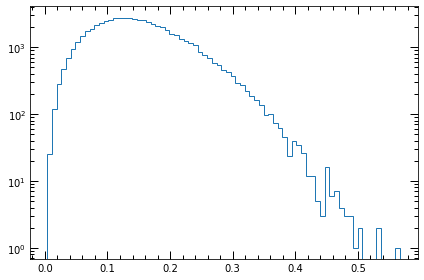

In [49]:
energy_spectrum(final_e, 75)

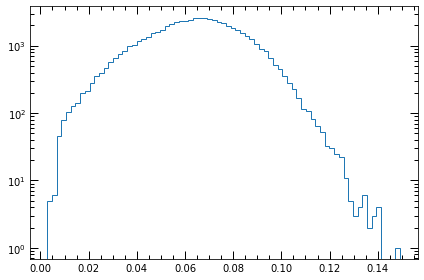

In [50]:
energy_spectrum(final_p, 75)

In [51]:
photon_final_nn = []
threshold = 0.5
for i, x in enumerate(xc_test[:200]):
    if i%100 == 0:
        print("{}%".format(i/len(xc_test) * 100))
    x = np.array([x])
    classification = model_class.predict(np.stack(x))
    if classification >= threshold:
        regr_x = np.array([x[0,:6]])
        regr_result = model_regr.predict(regr_x)
        photon_final_nn.append(np.linalg.norm(regr_result[0]))

0.0%
0.08060355945318545%


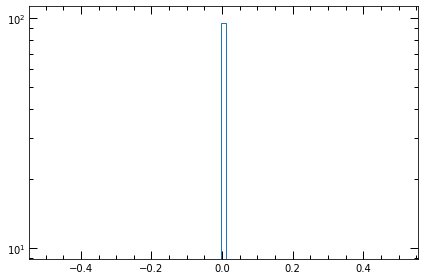

In [52]:
energy_spectrum(photon_final_nn, 75)

In [53]:
photon_final_nn

[0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003974036,
 0.003